# Analytics with Pandas : 2. Advanced operations

## [Download exercises zip](../_static/generated/pandas.zip)

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/pandas)

Let's see how to do more advanced operations with pandas, like grouping with `groupby`, joining tables with `merge`, and perform geospatial analysis with GeoPandas (only mentioned).

We chose to collect such topics in this notebook as tipically while executing these operations problems are more likely to arise and thus some further internet search is required.

## 1. Grouping


**Reference**: 

* [PythonDataScienceHandbook: Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

To group items and perform statistics on each group, you can use the `groupby` method.

Let's see an example of a possible grouping. First we reload again the [astropi.csv](astropi.csv) described in the [previous tutorial](https://en.softpython.org/pandas/pandas1-intro-sol.html)

In [1]:
import pandas as pd  
import numpy as np    

df = pd.read_csv('astropi.csv', encoding='UTF-8')

Suppose we want to calculate how many readings of `humidity` fall into the interval defined by each integer value of humidity `humidity_int`, so to be able to plot a bar chart like this (actually  there are faster methods [with numpy](https://stackoverflow.com/a/13130357) for making histograms but here we follow the step by step approach)

![humidity distribution](img/astropi-humidity-histogram.png)

### 1.1 Let's see a group

To get an initial idea, we could start checking only the rows that belong to the group `42`, that is have a humidity value lying between `42.0` included until `43.0` excluded. We can use the [transform](https://en.softpython.org/pandas/pandas1-intro-sol.html#6.5-Transforming-columns) method as previously seen, noting that group `42` holds `2776` rows:

In [2]:
df[ df['humidity'].transform(int) == 42]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
19222,2016-02-18 16:37:00,33.18,28.96,26.51,42.99,1006.10,1.19,53.23,313.69,9.081925,-32.244905,-35.135448,-0.000581,0.018936,0.014607,0.000563,0.000346,-0.000113,0
19619,2016-02-18 17:43:50,33.34,29.06,26.62,42.91,1006.30,1.50,52.54,194.49,-53.197113,-4.014863,-20.257249,-0.000439,0.018838,0.014526,-0.000259,0.000323,-0.000181,0
19621,2016-02-18 17:44:10,33.38,29.06,26.62,42.98,1006.28,1.01,52.89,195.39,-52.911983,-4.207085,-20.754475,-0.000579,0.018903,0.014580,0.000415,-0.000232,0.000400,0
19655,2016-02-18 17:49:51,33.37,29.07,26.62,42.94,1006.28,0.93,53.21,203.76,-43.124080,-8.181511,-29.151436,-0.000432,0.018919,0.014608,0.000182,0.000341,0.000015,0
19672,2016-02-18 17:52:40,33.33,29.06,26.62,42.93,1006.24,1.34,52.71,206.97,-36.893841,-10.130503,-31.484077,-0.000551,0.018945,0.014794,-0.000378,-0.000013,-0.000101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0


### 1.2 `groupby`

We can generlize and associate to each integer group the amount of rows belonging to that group with the `groupby` method. First let's make a column holding the integer humidity value for each group:

In [3]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

In [4]:
df[ ['time_stamp', 'humidity_int', 'humidity']  ].head()

,time_stamp,humidity_int,humidity
0,2016-02-16 10:44:40,44,44.94
1,2016-02-16 10:44:50,45,45.12
2,2016-02-16 10:45:00,45,45.12
3,2016-02-16 10:45:10,45,45.32
4,2016-02-16 10:45:20,45,45.18


Then we can call `groupby` by writing down:
    
- first the column where to group (`humidity_int`)
- second the column where to calculate the statistics
- finally the statistics to be performed, in this case `.count()` (other common ones are `sum()`, `min()`, `max()`, `mean()`...)

In [5]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

Note the result is a `Series`:

In [6]:
result = df.groupby(['humidity_int'])['humidity'].count()

In [7]:
type(result)

pandas.core.series.Series

Since we would like a customized bar chart, for the sake of simplicity we could use the native `plt.plot` function of matplotlib, for which we will need one sequence for $xs$ coordinates and another one for the $ys$.

The sequence for $xs$ can be extracted from the index of the `Series`: 

In [8]:
result.index

Int64Index([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            59, 60],
           dtype='int64', name='humidity_int')

For the $ys$ sequence we can directly use the `Series` like this:

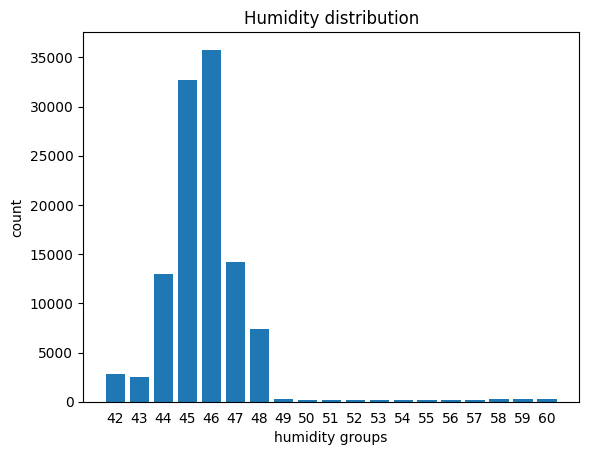

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.bar(result.index, result)

plt.xlabel('humidity groups')
plt.ylabel('count')
plt.title('Humidity distribution')

plt.xticks(result.index, result.index) # shows labels as integers
plt.tick_params(bottom=False)          # removes the little bottom lines 


plt.show()

### 1.3 Modifying a dataframe by plugging in the result of a grouping

Notice  we've got only 19 rows in the grouped series:

In [10]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

How could we fill the whole original table, assigning to each row the count of its own group?

We can use `transform` like this:

In [11]:
df.groupby(['humidity_int'])['humidity'].transform('count')

0         13029
1         32730
2         32730
3         32730
4         32730
          ...  
110864     2776
110865     2776
110866     2776
110867     2776
110868     2776
Name: humidity, Length: 110869, dtype: int64

As usual, `group_by` does not modify the dataframe, if we want the result stored in the dataframe we need to assign the result to a new column:

In [12]:
df['humidity_counts'] = df.groupby(['humidity_int'])['humidity'].transform('count')

In [13]:
df

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,humidity_int,humidity_counts
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,44,13029
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,45,32730
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,45,32730
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,45,32730
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,45,32730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,42,2776
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,42,2776
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,42,2776
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,42,2776


### 1.4 Exercise - meteo pressure intervals

✪✪✪ The dataset [meteo.csv](meteo.csv) contains the weather data of Trento, November 2017 (source: [www.meteotrentino.it](https://www.meteotrentino.it)). We would like to subdivide the pressure readings into three intervals `A (low)`, `B (medium)`, `C (high)`, and count how many readings have been made for each interval.  

**IMPORTANT**: assign the dataframe to a variable called `meteo` so to avoid confusion with other dataframes

#### 1.4.1 Where are the intervals?

First, let's find the pressure values for these 3 intervals and plot them as segments, so to end up with a chart like this:

![Expected pressure intervals](img/expected-pressure-intervals.png)

Before doing the plot, we will need to know at which height we should plot the segments.

Load the dataset with pandas, calculate the following variables and PRINT them 

- use `UTF-8` as encoding
- round values with `round` function
- the excursion is the difference between minimum and maximum
- note `intervalC` coincides with the maximum

**DO NOT** use `min` and `max` as variable names (they are reserved functions!!)

In [14]:
import pandas as pd  

# write here

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
minimum = meteo['Pressure'].min()
maximum = meteo['Pressure'].max()
excursion = maximum - minimum
intervalA,intervalB,intervalC = minimum + excursion/3.0, minimum + excursion*2.0/3.0, minimum + excursion  
intervalA,intervalB,intervalC = round(intervalA,2), round(intervalB,2),round(intervalC,2)

print('minimum:',minimum)
print('maximum:', maximum)
print('excursion:', excursion)
print('intervalA:', intervalA)
print('intervalB:', intervalB)
print('intervalC:', intervalC)

minimum: 966.3
maximum: 998.3
excursion: 32.0
intervalA: 976.97
intervalB: 987.63
intervalC: 998.3


In [14]:
import pandas as pd  

# write here



minimum: 966.3
maximum: 998.3
excursion: 32.0
intervalA: 976.97
intervalB: 987.63
intervalC: 998.3


#### 1.4.2 Segments plot 

Try now to plot the chart of pressure and the 4 horizontal segments.

- to overlay the segments with different colors, just make repeated calls to `plt.plot`
- a segment is defined by two points: so just find the coordinates of those two points..
- try leaving some space above and below the chart

**REMEMBER** title and labels

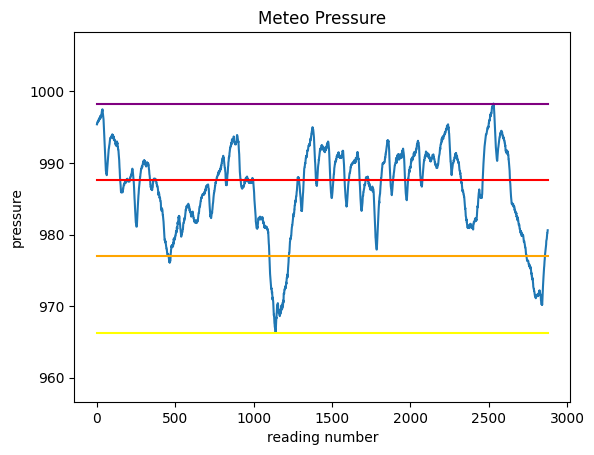

In [15]:
# write here

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ylim(minimum*0.99,maximum*1.01) # sspace below and above
meteo['Pressure'].plot()
plt.plot([0,meteo.shape[0]], [minimum, minimum],    color="yellow")
plt.plot([0,meteo.shape[0]], [intervalA,intervalA], color="orange")
plt.plot([0,meteo.shape[0]], [intervalB,intervalB], color="red")
plt.plot([0,meteo.shape[0]], [intervalC,intervalC], color="purple")
plt.title('Meteo Pressure')
plt.xlabel('reading number')
plt.ylabel('pressure')


plt.plot()
plt.show()

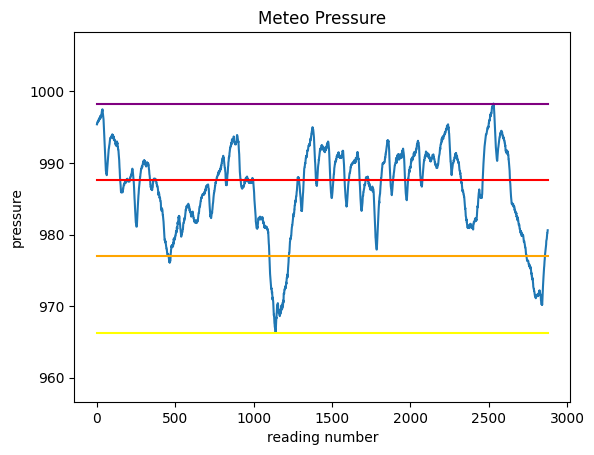

In [15]:
# write here



#### 1.4.3 Assigning the intervals

We literally made a picture of where the intervals are located - let's now ask ourselves how many readings have been done for each interval.

First, try creating a column which assigns to each reading the interval where it belongs to.

- **HINT 1**: use `transform`
- **HINT 2**: in the function you are going to define, do **not** recalculate inside values such as minimum, maximum, intervals etc because it would slow down Pandas. Instead, use the variables we've already defined - remember that `transform` riexecutes the argument function for each row!

In [16]:
# write here

def fintervals(pressure):    
    
    if pressure < intervalA:
        return "A (low)"
    elif pressure < intervalB :
        return "B (medium)"
    else:
        return "C (high)"

meteo['PressureInterval'] = meteo['Pressure'].transform(fintervals)
meteo

,Date,Pressure,Rain,Temp,PressureInterval
0,01/11/2017 00:00,995.4,0.0,5.4,C (high)
1,01/11/2017 00:15,995.5,0.0,6.0,C (high)
2,01/11/2017 00:30,995.5,0.0,5.9,C (high)
3,01/11/2017 00:45,995.7,0.0,5.4,C (high)
4,01/11/2017 01:00,995.7,0.0,5.3,C (high)
...,...,...,...,...,...
2873,30/11/2017 23:00,980.0,0.0,0.2,B (medium)
2874,30/11/2017 23:15,980.2,0.0,0.5,B (medium)
2875,30/11/2017 23:30,980.2,0.0,0.6,B (medium)
2876,30/11/2017 23:45,980.5,0.0,0.2,B (medium)


In [16]:
# write here



,Date,Pressure,Rain,Temp,PressureInterval
0,01/11/2017 00:00,995.4,0.0,5.4,C (high)
1,01/11/2017 00:15,995.5,0.0,6.0,C (high)
2,01/11/2017 00:30,995.5,0.0,5.9,C (high)
3,01/11/2017 00:45,995.7,0.0,5.4,C (high)
4,01/11/2017 01:00,995.7,0.0,5.3,C (high)
...,...,...,...,...,...
2873,30/11/2017 23:00,980.0,0.0,0.2,B (medium)
2874,30/11/2017 23:15,980.2,0.0,0.5,B (medium)
2875,30/11/2017 23:30,980.2,0.0,0.6,B (medium)
2876,30/11/2017 23:45,980.5,0.0,0.2,B (medium)


#### 1.4.4 Grouping by intervals

We would like to have an histogram like this one:

![pressure distribution](img/pressure-distribution.png)

a. First, create a grouping to count occurrences:

In [17]:
# write here
meteo.groupby(['PressureInterval'])['Pressure'].count()

PressureInterval
A (low)        255
B (medium)    1243
C (high)      1380
Name: Pressure, dtype: int64

In [17]:
# write here



PressureInterval
A (low)        255
B (medium)    1243
C (high)      1380
Name: Pressure, dtype: int64

b. Now plot it

- **NOTE**: the result of `groupby` is also a `Series`, so it's plottable as we've already seen...
- **REMEMBER** title and axis labels

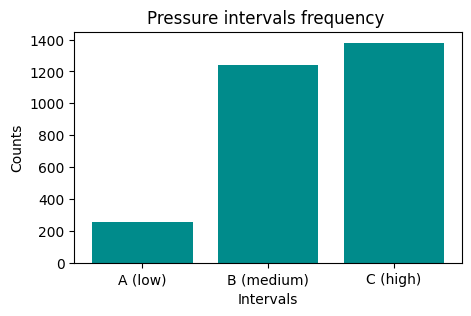

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# write here

g = meteo.groupby(['PressureInterval'])['Pressure'].count()
plt.figure(figsize=(5,3))
plt.title('Pressure intervals frequency ')
plt.xlabel('Intervals')
plt.ylabel('Counts')
plt.bar(g.index, g, color='darkcyan')

plt.show()

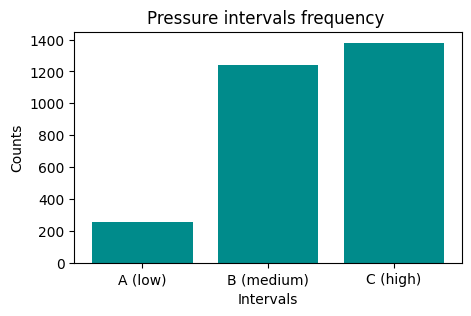

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# write here



### 1.5 Exercise - meteo average temperature

✪✪✪ Calculate the average temperature for each day, and show it in the plot, so to have a couple new columns like these:

```
    Day       Avg_day_temp
01/11/2017      7.983333
01/11/2017      7.983333
01/11/2017      7.983333
    .               .
    .               .
02/11/2017      7.384375
02/11/2017      7.384375
02/11/2017      7.384375
    .               .
    .               .
```

**HINT 1**: add  `'Day'` column by extracting only the day from the date. To do it, use the function  `.str`applied to all the column.

**HINT 2**: There are various ways to solve the exercise:

- Most perfomant and elegant is with `groupby` operator, see [Pandas trasform - more than meets the eye](https://towardsdatascience.com/pandas-transform-more-than-meets-the-eye-928542b40b56)
- As alternative, you may use a `for` to cycle through days. Typically, using a `for` is not a good idea with Pandas, as on large datasets it can take a lot to perform the updates. Still, since this dataset is small enough,  you should get results in a decent amount of time.

In [19]:
# write here



****SOLUTION 1 (EFFICIENT) -  best solution with groupby and transform 
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


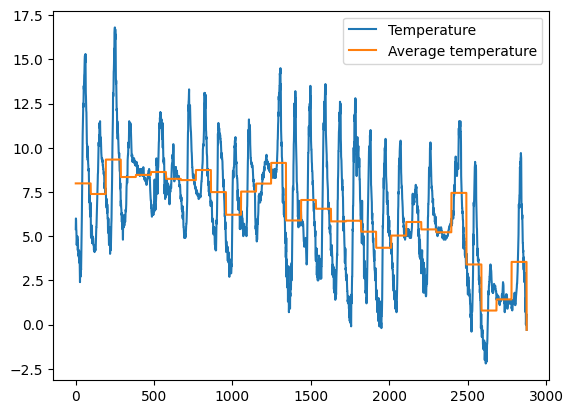

In [20]:
# SOLUTION

print()
print('****SOLUTION 1 (EFFICIENT) -  best solution with groupby and transform ')

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Day'] = meteo['Date'].str[0:10]
# .transform is needed to avoid getting a table with only 30 lines
meteo['Avg_day_temp'] = meteo.groupby('Day')['Temp'].transform('mean')

print(meteo.head())
meteo.Temp.plot(label="Temperature", legend=True)
meteo.Avg_day_temp.plot(label="Average temperature", legend=True)
plt.show()


****SOLUTION 1 (EFFICIENT) -  best solution with groupby and transform 
               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


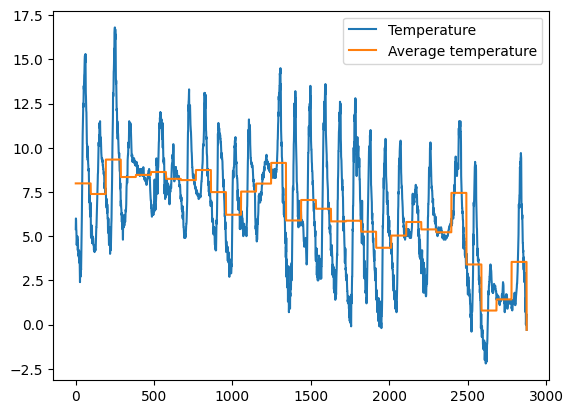


********  SOLUTION 2 (SLOW) - recalculate average for every row !

               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


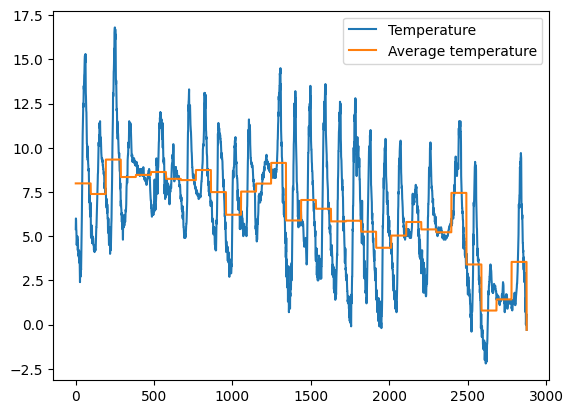

In [21]:
# SOLUTION

print()
print('********  SOLUTION 2 (SLOW) - recalculate average for every row !')
print()

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Day'] = meteo['Date'].str[0:10]

#print("WITH DAY")
#print(meteo.head())
for day in meteo['Day']:
    avg_day_temp = meteo[(meteo.Day == day)].Temp.values.mean()
    meteo.loc[(meteo.Day == day),'Avg_day_temp']= avg_day_temp

print(meteo.head())
meteo.Temp.plot(label="Temperature", legend=True)
meteo.Avg_day_temp.plot(label="Average temperature", legend=True)    
plt.show()


***** SOLUTION 3 (STILL SLOW) - recalculate average only 30 times
                      by using a dictionary d_avg, faster but not yet optimal

               Date  Pressure  Rain  Temp         Day  Avg_day_temp
0  01/11/2017 00:00     995.4   0.0   5.4  01/11/2017      7.983333
1  01/11/2017 00:15     995.5   0.0   6.0  01/11/2017      7.983333
2  01/11/2017 00:30     995.5   0.0   5.9  01/11/2017      7.983333
3  01/11/2017 00:45     995.7   0.0   5.4  01/11/2017      7.983333
4  01/11/2017 01:00     995.7   0.0   5.3  01/11/2017      7.983333


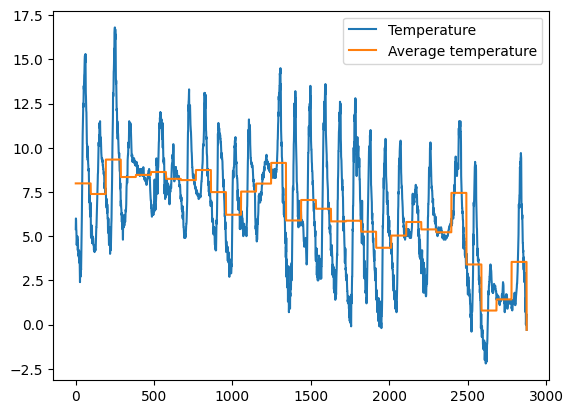

In [22]:
# SOLUTION

print()
print('***** SOLUTION 3 (STILL SLOW) - recalculate average only 30 times')
print('                      by using a dictionary d_avg, faster but not yet optimal')
print()

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Day'] = meteo['Date'].str[0:10]
#print()
#print("WITH DAY")
#print(meteo.head())
d_avg = {}
for day in meteo['Day']:
    if day not in d_avg:
        d_avg[day] =  meteo[ meteo['Day'] == day  ]['Temp'].mean()

for day in meteo['Day']:
    meteo.loc[(meteo.Day == day),'Avg_day_temp']= d_avg[day]
    
print(meteo.head())
meteo.Temp.plot(label="Temperature", legend=True)
meteo.Avg_day_temp.plot(label="Average temperature", legend=True)    
plt.show()

## 2. Merging tables

Suppose we want to add a column with geographical position of the ISS. To do so, we would need to join our dataset with another one containing such information. Let's take for example the dataset [iss-coords.csv](iss-coords.csv)

In [23]:
iss_coords = pd.read_csv('iss-coords.csv', encoding='UTF-8')

In [24]:
iss_coords

,timestamp,lat,lon
0,2016-01-01 05:11:30,-45.103458,14.083858
1,2016-01-01 06:49:59,-37.597242,28.931170
2,2016-01-01 11:52:30,17.126141,77.535602
3,2016-01-01 11:52:30,17.126464,77.535861
4,2016-01-01 14:54:08,7.259561,70.001561
...,...,...,...
333,2016-02-29 13:23:17,-51.077590,-31.093987
334,2016-02-29 13:44:13,30.688553,-135.403820
335,2016-02-29 13:44:13,30.688295,-135.403533
336,2016-02-29 18:44:57,27.608774,-130.198781


We notice there is a `timestamp` column, which unfortunately has a slightly different name that `time_stamp` column (notice the underscore `_`) in original astropi dataset:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time_stamp       110869 non-null  object 
 1   temp_cpu         110869 non-null  float64
 2   temp_h           110869 non-null  float64
 3   temp_p           110869 non-null  float64
 4   humidity         110869 non-null  float64
 5   pressure         110869 non-null  float64
 6   pitch            110869 non-null  float64
 7   roll             110869 non-null  float64
 8   yaw              110869 non-null  float64
 9   mag_x            110869 non-null  float64
 10  mag_y            110869 non-null  float64
 11  mag_z            110869 non-null  float64
 12  accel_x          110869 non-null  float64
 13  accel_y          110869 non-null  float64
 14  accel_z          110869 non-null  float64
 15  gyro_x           110869 non-null  float64
 16  gyro_y           110869 non-null  floa

To merge datasets according to the columns, we can use the command `merge` like this:

In [26]:
# remember merge produces a NEW dataframe

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp')

# merge will add both time_stamp and timestamp columns, 
# so we remove the duplicate column `timestamp`
geo_astropi = geo_astropi.drop('timestamp', axis=1)

In [27]:
geo_astropi

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,humidity_int,humidity_counts,lat,lon
0,2016-02-19 03:49:00,32.53,28.37,25.89,45.31,1006.04,1.31,51.63,34.91,21.125001,...,0.018851,0.014607,0.000060,-0.000304,0.000046,0,45,32730,31.434741,52.917464
1,2016-02-19 14:30:40,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,0.018687,0.014502,0.000208,-0.000499,0.000034,0,45,32730,-46.620658,-57.311657
2,2016-02-19 14:30:40,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,0.018687,0.014502,0.000208,-0.000499,0.000034,0,45,32730,-46.620477,-57.311138
3,2016-02-21 22:14:11,32.21,28.05,25.50,47.36,1012.41,0.67,52.40,27.57,15.441683,...,0.018800,0.014136,-0.000015,-0.000159,0.000221,0,47,14176,19.138359,-140.211489
4,2016-02-23 23:40:50,32.32,28.18,25.61,47.45,1010.62,1.14,51.41,33.68,11.994554,...,0.018276,0.014124,0.000368,0.000368,0.000030,0,47,14176,4.713819,80.261665
5,2016-02-24 10:05:51,32.39,28.26,25.70,46.83,1010.51,0.61,51.91,287.86,6.554283,...,0.018352,0.014344,-0.000664,-0.000518,0.000171,0,46,35775,-46.061583,22.246025
6,2016-02-25 00:23:01,32.38,28.18,25.62,46.52,1008.28,0.90,51.77,30.80,9.947132,...,0.018502,0.014366,0.000290,0.000314,-0.000375,0,46,35775,47.047346,137.958918
7,2016-02-27 01:43:10,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,0.017930,0.014378,-0.000026,-0.000013,-0.000047,0,45,32730,-41.049112,30.193004
8,2016-02-27 01:43:10,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,0.017930,0.014378,-0.000026,-0.000013,-0.000047,0,45,32730,-8.402991,-100.981726
9,2016-02-28 09:48:40,32.62,28.62,26.02,45.15,1006.06,1.12,50.44,301.74,10.348327,...,0.017620,0.014725,-0.000358,-0.000301,-0.000061,0,45,32730,50.047523,175.566751


### Exercise 2.1 - better merge

If you notice, above table does have `lat` and `lon` columns, but has very few rows. Why ?  Try to merge the tables in some meaningful way so to have all the original rows and all cells of `lat` and `lon` filled. 

- For other merging stategies, read about attribute `how` in  [Why And How To Use Merge With Pandas in Python](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)
- To fill missing values don't use fancy interpolation techniques, just put the station position in that given day or hour

In [28]:
# write here

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp', how='left')

pd.merge_ordered(df, iss_coords, fill_method='ffill', how='left', left_on='time_stamp', right_on='timestamp')
geo_astropi

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_z,gyro_x,gyro_y,gyro_z,reset,humidity_int,humidity_counts,timestamp,lat,lon
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,0.014569,0.000942,0.000492,-0.000750,20,44,13029,NaN,NaN,NaN
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0.014577,0.000218,-0.000005,-0.000235,0,45,32730,NaN,NaN,NaN
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0.014357,0.000395,0.000600,-0.000003,0,45,32730,NaN,NaN,NaN
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0.014409,0.000308,0.000577,-0.000102,0,45,32730,NaN,NaN,NaN
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0.014380,0.000321,0.000691,0.000272,0,45,32730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110866,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,0.014646,-0.000264,0.000206,0.000196,0,42,2776,NaN,NaN,NaN
110867,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,0.014855,0.000143,0.000199,-0.000024,0,42,2776,NaN,NaN,NaN
110868,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,0.014799,0.000537,0.000257,0.000057,0,42,2776,NaN,NaN,NaN
110869,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,0.014877,0.000534,0.000456,0.000195,0,42,2776,NaN,NaN,NaN


In [28]:
# write here



,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_z,gyro_x,gyro_y,gyro_z,reset,humidity_int,humidity_counts,timestamp,lat,lon
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,0.014569,0.000942,0.000492,-0.000750,20,44,13029,NaN,NaN,NaN
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0.014577,0.000218,-0.000005,-0.000235,0,45,32730,NaN,NaN,NaN
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0.014357,0.000395,0.000600,-0.000003,0,45,32730,NaN,NaN,NaN
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0.014409,0.000308,0.000577,-0.000102,0,45,32730,NaN,NaN,NaN
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0.014380,0.000321,0.000691,0.000272,0,45,32730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110866,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,0.014646,-0.000264,0.000206,0.000196,0,42,2776,NaN,NaN,NaN
110867,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,0.014855,0.000143,0.000199,-0.000024,0,42,2776,NaN,NaN,NaN
110868,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,0.014799,0.000537,0.000257,0.000057,0,42,2776,NaN,NaN,NaN
110869,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,0.014877,0.000534,0.000456,0.000195,0,42,2776,NaN,NaN,NaN


## 3. GeoPandas

You can easily manipulate geographical data with [GeoPandas](https://geopandas.org/) library. For some nice online tutorial, we refer to [Geospatial Analysis and Representation for Data Science](https://napo.github.io/geospatial_course_unitn/) course website @ master in Data Science University of Trento, by Maurizio Napolitano (FBK)

## Continue

Go on with the [challenges](https://en.softpython.org/pandas/pandas3-chal.html) worksheet